In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd


Ejercicio - ciudades de Colombia
Llevar la latitud y longitud a una forma geométrica de Punto, y junto a los datos del DataFrame df_ciudad, generar el GeoDataFrame geo_ciudad.
Con el método gpd.points_from_xy(df_locales.X, df_locales.Y) lo realizamos.

In [2]:
df_ciudad = pd.DataFrame(
    {'Ciudad': ['Bogota','Cali', 'Medellin', 'Barranquilla'],
     'Latitud': [4.60971, 3.43722, 6.25184, 10.96854],
     'Longitud': [-74.08175, -76.5225, -75.56359, -74.78132]})

In [13]:
bogota_mask = df_ciudad['Ciudad']=='Bogota'
cali_mask = df_ciudad['Ciudad']=='Cali'
medellin_mask = df_ciudad['Ciudad']=='Medellin'
barranquilla_mask = df_ciudad['Ciudad']=='Barranquilla'

In [16]:
geo_ciudades = gpd.GeoDataFrame(df_ciudad, geometry= gpd.points_from_xy(df_ciudad.Longitud,df_ciudad.Latitud))
geo_ciudades

,Ciudad,Latitud,Longitud,geometry
0,Bogota,4.60971,-74.08175,POINT (-74.08175 4.60971)
1,Cali,3.43722,-76.52250,POINT (-76.52250 3.43722)
2,Medellin,6.25184,-75.56359,POINT (-75.56359 6.25184)
3,Barranquilla,10.96854,-74.78132,POINT (-74.78132 10.96854)


Que tipo de datos tiene la nueva columna geometry?

In [18]:
type(geo_ciudades)

geopandas.geodataframe.GeoDataFrame

Usar este código para leer el polígono que representa al contorno de Colombia:


In [19]:
type(geo_ciudades.geometry)

geopandas.geoseries.GeoSeries

Usar este código para leer el polígono que representa al contorno de Colombia:


In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_colombia = world[world.name=='Colombia']
geo_colombia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."


tipo de datos de geo_col


In [21]:
type(geo_colombia)

geopandas.geodataframe.GeoDataFrame

Usando la funcion graficar, generar un grafico de las ciudades sobre el mapa del pais.

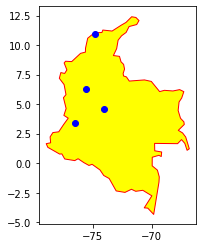

In [31]:
import matplotlib.pyplot as plt

ax = geo_colombia.plot(color='yellow', edgecolor='red')

geo_ciudades.plot(ax=ax, color= 'blue')

plt.show()

Crear una línea entre las ciudades de Bogotá y Barranquilla.

In [26]:
from shapely.geometry import Point
from shapely.geometry import LineString

punto_bog = Point(df_ciudad[bogota_mask]['Longitud'],df_ciudad[bogota_mask]['Latitud'])
punto_bar = Point(df_ciudad[barranquilla_mask]['Longitud'],df_ciudad[barranquilla_mask]['Latitud'])

linea_bog_bar = LineString([punto_bog,punto_bar])

In [28]:
linea_bb_geo = gpd.GeoSeries([punto_bog, punto_bar, linea_bog_bar])



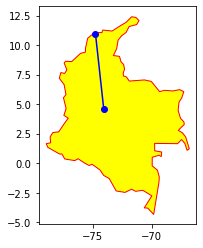

In [33]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
geo_colombia.plot(ax=ax,color='yellow', edgecolor='red')
linea_bb_geo.plot(ax=ax, color='blue')
plt.show();